### Linear Regression in Python(gradient descent)

In [1]:
# loading data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv('ex1data2.txt')
print(data.shape)
data.head()

(47, 3)


,sqft,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [40]:
sqft = data['sqft'].values
beds = data['bedrooms'].values
price = data['price'].values

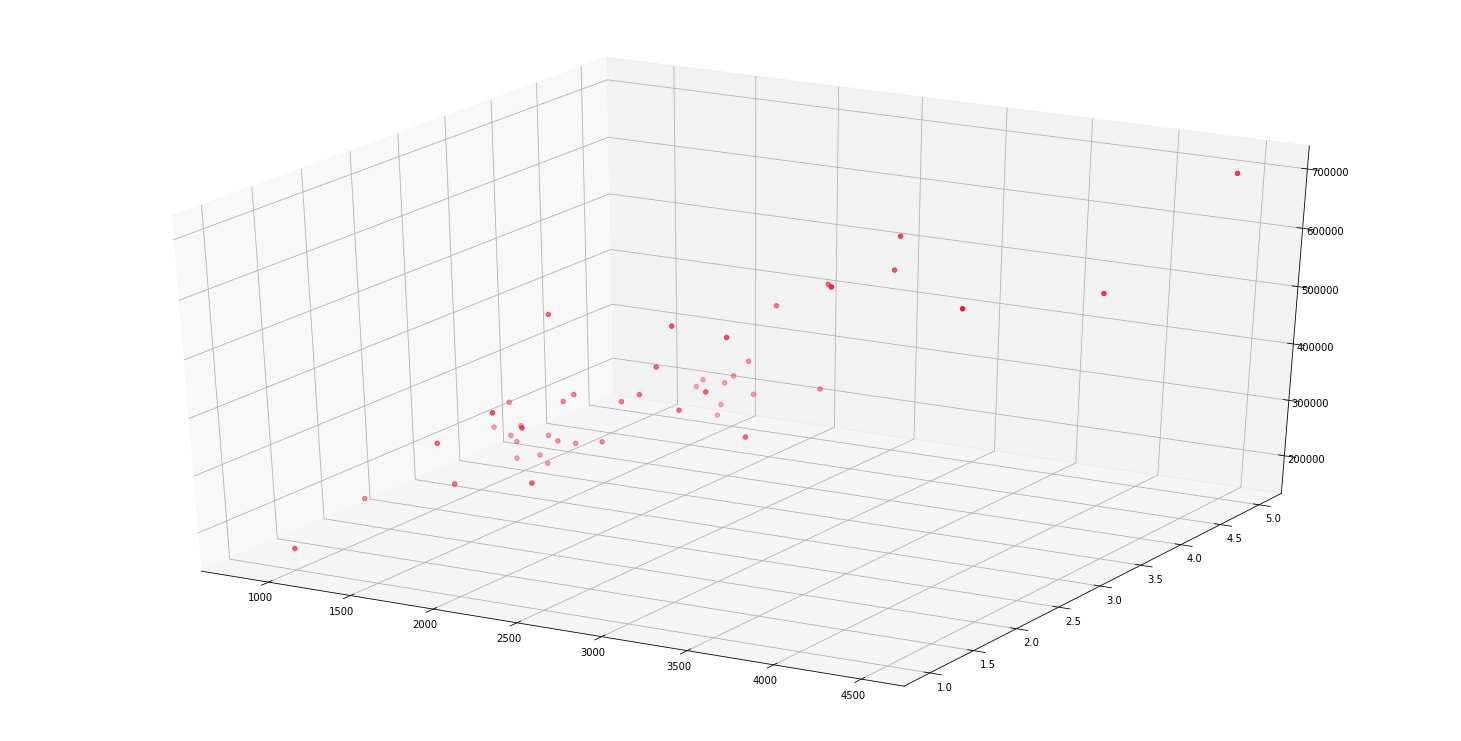

In [3]:
%matplotlib inline
# Ploting as scatter plot
plt.rcParams['figure.figsize'] = (20.0, 10.0)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(sqft, beds, price, color='#ef1234')
plt.show()

In [41]:
def feature_norm(feature):
    # returns normed features
    mean_feature = np.mean(feature)
    std_feature = np.std(feature)
    feature_norm = (feature - mean_feature)/(std_feature)
    
    return feature_norm,mean_feature,std_feature

In [42]:
# feature normalising the input
sqft,sqft_mu,sqft_sigma = feature_norm(sqft)
beds,beds_mu,beds_sigma = feature_norm(beds)

In [17]:
m = len(sqft)
x0 = np.ones(m)
X = np.array([x0, sqft, beds]).T
print(X) # X after feature normalisation
# Initial Coefficients
theta = np.array([0.0001, 0.0001, 0.0001])
Y = np.array(price)
alpha = 0.0005

[[ 1.00000000e+00  1.31415422e-01 -2.26093368e-01]
 [ 1.00000000e+00 -5.09640698e-01 -2.26093368e-01]
 [ 1.00000000e+00  5.07908699e-01 -2.26093368e-01]
 [ 1.00000000e+00 -7.43677059e-01 -1.55439190e+00]
 [ 1.00000000e+00  1.27107075e+00  1.10220517e+00]
 [ 1.00000000e+00 -1.99450507e-02  1.10220517e+00]
 [ 1.00000000e+00 -5.93588523e-01 -2.26093368e-01]
 [ 1.00000000e+00 -7.29685755e-01 -2.26093368e-01]
 [ 1.00000000e+00 -7.89466782e-01 -2.26093368e-01]
 [ 1.00000000e+00 -6.44465993e-01 -2.26093368e-01]
 [ 1.00000000e+00 -7.71822042e-02  1.10220517e+00]
 [ 1.00000000e+00 -8.65999486e-04 -2.26093368e-01]
 [ 1.00000000e+00 -1.40779041e-01 -2.26093368e-01]
 [ 1.00000000e+00  3.15099326e+00  2.43050370e+00]
 [ 1.00000000e+00 -9.31923697e-01 -2.26093368e-01]
 [ 1.00000000e+00  3.80715024e-01  1.10220517e+00]
 [ 1.00000000e+00 -8.65782986e-01 -1.55439190e+00]
 [ 1.00000000e+00 -9.72625673e-01 -2.26093368e-01]
 [ 1.00000000e+00  7.73743478e-01  1.10220517e+00]
 [ 1.00000000e+00  1.31050078e+

In [26]:
def cost_function(X, Y, theta):
    m = len(Y)
    J = np.sum(np.square((X.dot(theta) - Y)))/(2 * m)
    return J

In [27]:
def gradient_descent(X, Y, theta, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        hypo = X.dot(theta)
        loss = hypo - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of theta using Gradient
        theta = theta - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, theta)
        cost_history[iteration] = cost 
        
    return theta, cost_history 

In [28]:
# 10000 Iterations
new_theta, cost_history = gradient_descent(X, Y, theta, alpha, 10000)

print(new_theta)

# Final Cost
print(cost_history[-1])

[340412.65957447 109447.79646964  -6578.35485416]
2043280050.6028283


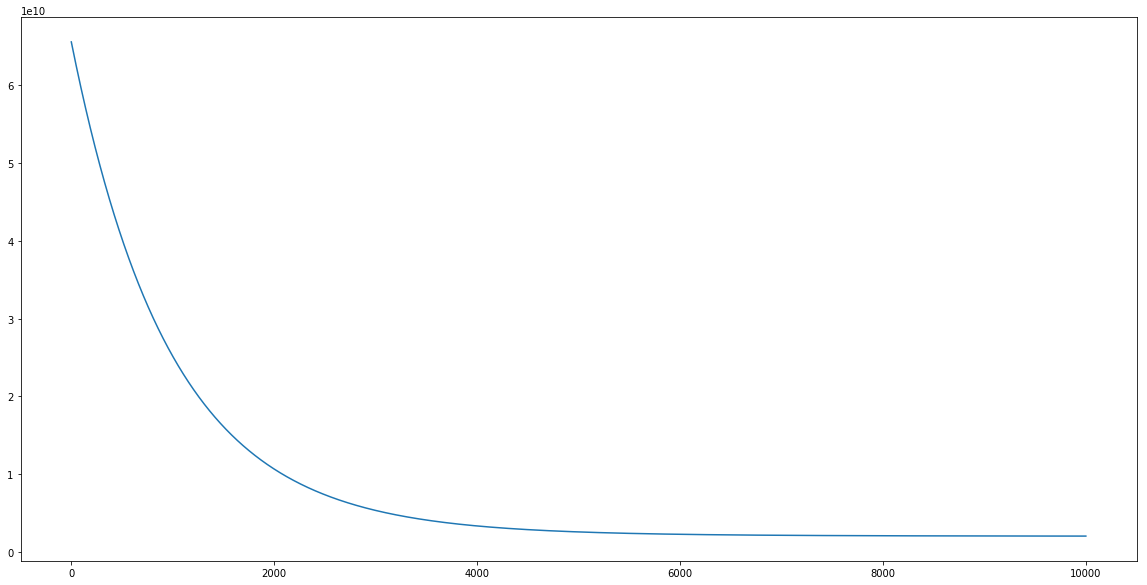

In [19]:
# ploting the cost history
plt.plot(list(range(10000)),cost_history)

[340412.65957445 109447.698242    -6578.25662652]
2043280050.6070747


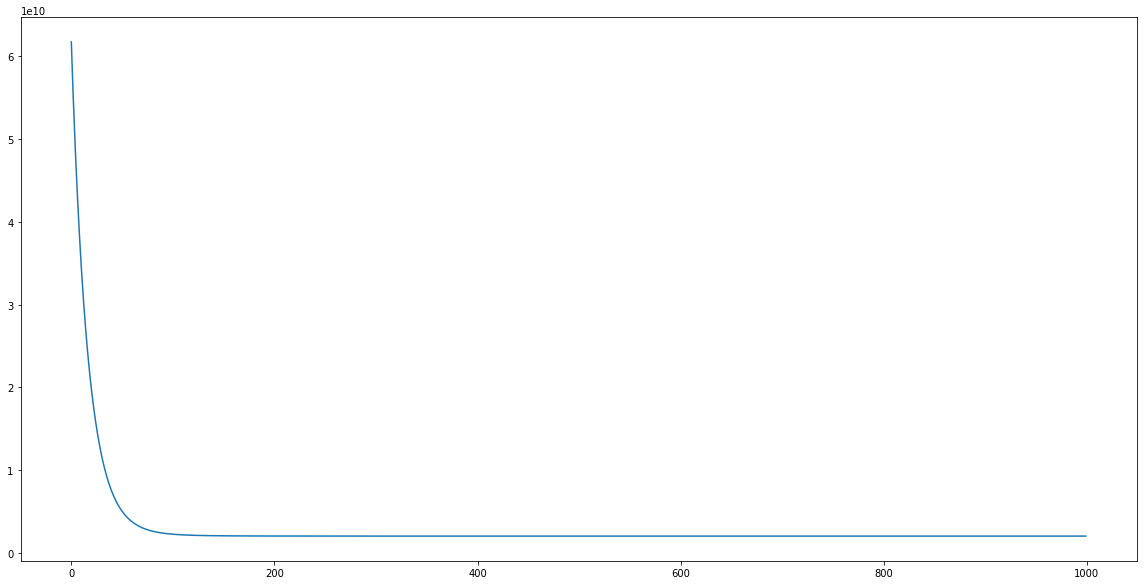

In [24]:

# lets try increasing the alpha value and see if can be made faster
alpha = 0.03

new_theta, cost_history = gradient_descent(X, Y, theta, alpha, 1000)

print(new_theta)
print(cost_history[-1])
plt.plot(list(range(1000)),cost_history)

In [45]:
# calculate the price of the house given size in sqft and beds
house_1 = np.array([1,2000,3])
house_1_normed = np.array([1.0,(2000-sqft_mu)/sqft_sigma,(3-beds_mu)/beds_sigma])
house_price = np.sum(house_1_normed.T.dot(new_theta))
print("house price of 2000 sqft with 3 beds is:") 
print(house_price)

house price of 2000 sqft with 3 beds is:
341805.2002410641


In [48]:
# testing from scikit learn approach
from sklearn import linear_model as lm
lmodel = lm.LinearRegression()
lmodel.fit(X,Y)
print(lmodel.intercept_)
print(lmodel.coef_)
print("house price of 2000 sqft with 3beds is: ")
print(int(lmodel.predict(house_1_normed.reshape(1,-1))))

340412.6595744681
[     0.         109447.79646964  -6578.35485416]
house price of 2000 sqft with 3beds is: 
341805
